# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

## Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [63]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [64]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [66]:
df.shape

(147972, 21)

In [67]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [68]:
df.duplicated().sum()

0

In [69]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


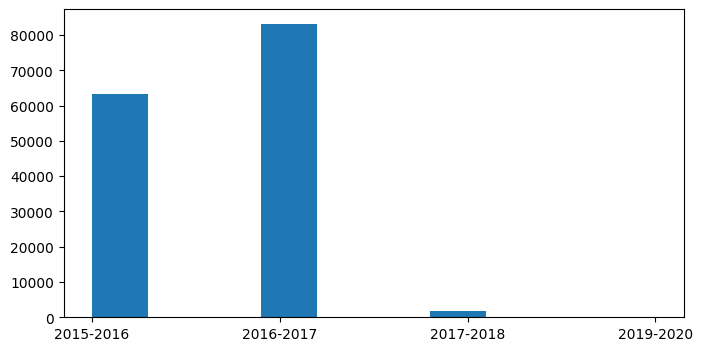

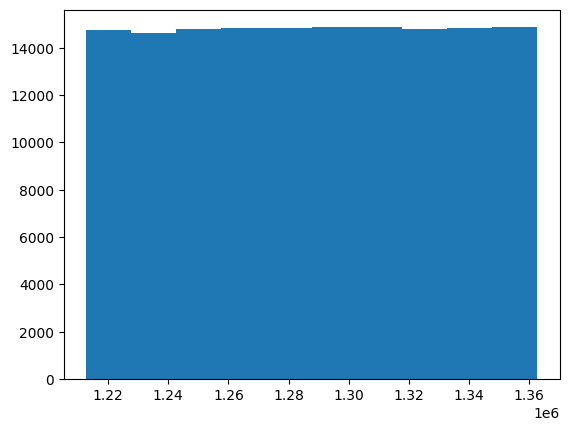

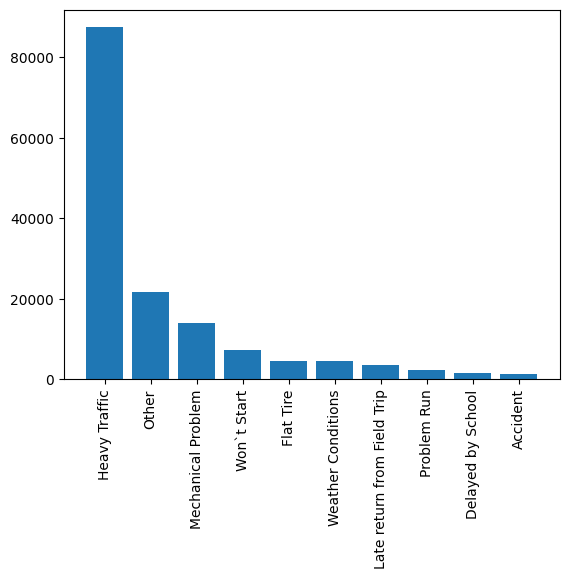

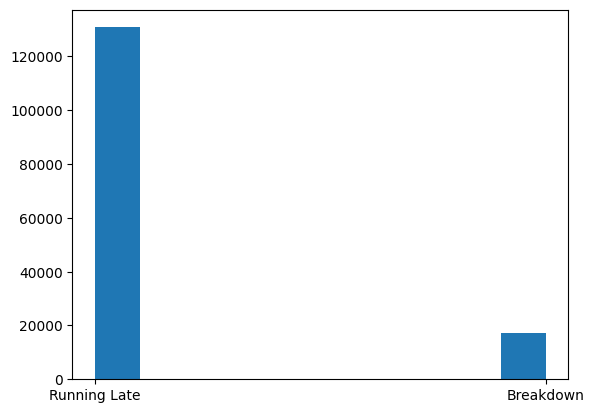

In [70]:
plt.figure(figsize=(8,4))

plt.hist(df['School_Year'])
plt.show()

plt.hist(df['Busbreakdown_ID'])
plt.show()

plt.bar(df['Reason'].value_counts().index, df['Reason'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

plt.hist(df['Breakdown_or_Running_Late'])
plt.show()



## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [71]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [72]:
df.drop('Incident_Number',inplace=True,axis=1)

In [73]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [74]:
df['How_Long_Delayed']

,How_Long_Delayed
0,10MINUTES
1,25 MINUTES
2,15 MINUTES
3,10 minutes
4,10MINUTES
...,...
147967,15-20
147968,20 MINS
147969,20-25MINS
147970,NaN


In [75]:
df.shape[0]-df.dropna().shape[0]

27419

In [76]:
df.dropna().shape

(120553, 20)

In [77]:
df.shape

(147972, 20)

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120553 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      120553 non-null  object
 1   Busbreakdown_ID                  120553 non-null  int64 
 2   Run_Type                         120553 non-null  object
 3   Bus_No                           120553 non-null  object
 4   Route_Number                     120553 non-null  object
 5   Reason                           120553 non-null  object
 6   Schools_Serviced                 120553 non-null  object
 7   Occurred_On                      120553 non-null  object
 8   Created_On                       120553 non-null  object
 9   Boro                             120553 non-null  object
 10  Bus_Company_Name                 120553 non-null  object
 11  How_Long_Delayed                 120553 non-null  object
 12  Number_Of_Students_On

In [81]:
for col in df.select_dtypes('object').columns:
  print(col)
  print(df[col].unique())
  print(df[col].unique().shape)
  print()

School_Year
['2015-2016' '2016-2017' '2017-2018']
(3,)

Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'Special Ed PM Run' 'General Ed AM Run'
 'General Ed Field Trip' 'General Ed PM Run' 'Special Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
(10,)

Bus_No
['811' '9302' '358' ... '9509' '42067' 'GVC510']
(10001,)

Route_Number
['1' '2' '4' ... '9304' '29AM' '1409B']
(10355,)

Reason
['Other' 'Heavy Traffic' 'Delayed by School' 'Problem Run'
 'Late return from Field Trip' 'Mechanical Problem' 'Flat Tire'
 'Weather Conditions' 'Accident' 'Won`t Start']
(10,)

Schools_Serviced
['C353' 'C814' 'C195' ... '03145, 05065, 03165, 03421, 03862'
 '02654, 02721,' '04377, 04454, 04658']
(4614,)

Occurred_On
['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '03/24/2017 03:40:00 PM'
 '05/25/2017 04:22:00 PM' '05/25/2017 04:36:00 PM']
(60460,)

Created_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '

In [82]:
df['School_Year'] = df['School_Year'].map({'2015-2016': 1, '2016-2017': 2,'2017-2018':3})

In [88]:
cols = ['Run_Type','School_Age_or_PreK','Reason','Boro','Bus_Company_Name',
        'Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools',
        'How_Long_Delayed','Boro','Schools_Serviced','Bus_No','Route_Number']
ord = OrdinalEncoder()
df[cols] = ord.fit_transform(df[cols])

In [89]:
for col in df.select_dtypes('object').columns:
  print(col)
  print(df[col].unique())
  print(df[col].unique().shape)
  print()

Occurred_On
['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '03/24/2017 03:40:00 PM'
 '05/25/2017 04:22:00 PM' '05/25/2017 04:36:00 PM']
(60460,)

Created_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '03/24/2017 03:47:00 PM'
 '05/25/2017 04:28:00 PM' '05/25/2017 04:37:00 PM']
(64945,)

Informed_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '03/24/2017 03:47:00 PM'
 '05/25/2017 04:28:00 PM' '05/25/2017 04:37:00 PM']
(64945,)

Last_Updated_On
['10/26/2015 08:40:39 AM' '10/27/2015 07:11:22 AM'
 '09/18/2015 07:38:44 AM' ... '04/24/2017 07:44:15 AM'
 '05/25/2017 04:34:36 PM' '05/25/2017 04:37:37 PM']
(118972,)

Breakdown_or_Running_Late
['Running Late' 'Breakdown']
(2,)



In [90]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

In [91]:
df['Occurred_On_Year'] = df['Occurred_On'].dt.year
df['Occurred_On_Month'] = df['Occurred_On'].dt.month

df['Created_On_Year'] = df['Created_On'].dt.year
df['Created_On_Month'] = df['Created_On'].dt.month

df['Informed_On_Year'] = df['Informed_On'].dt.year
df['Informed_On_Month'] = df['Informed_On'].dt.month

df['Last_Updated_On_Year'] = df['Last_Updated_On'].dt.year
df['Last_Updated_On_Month'] = df['Last_Updated_On'].dt.month

In [92]:
df.drop(['Occurred_On','Created_On','Informed_On','Last_Updated_On'],axis=1,inplace=True)

In [93]:
df.shape

(120553, 24)

In [94]:
df['Breakdown_or_Running_Late'] = df['Breakdown_or_Running_Late'].map({'Breakdown': 1, 'Running Late': 0})

<Axes: >

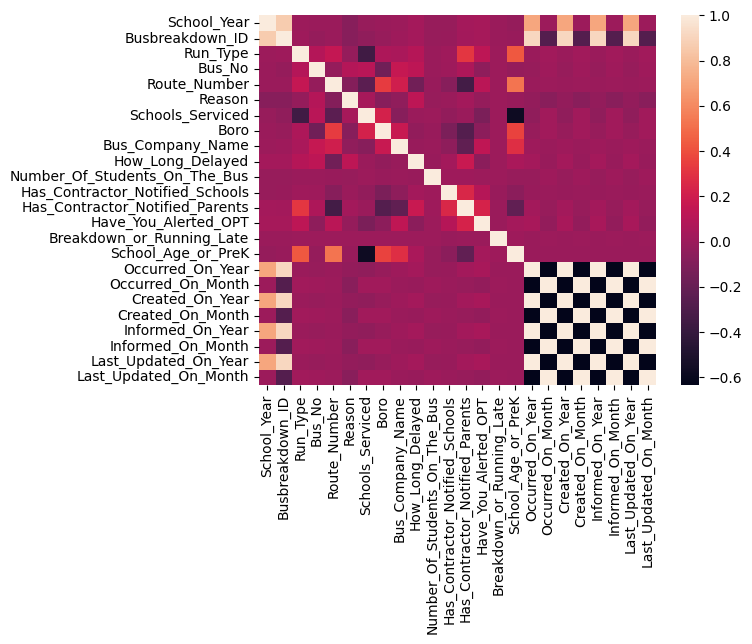

In [95]:
sns.heatmap(df.corr())

<Axes: >

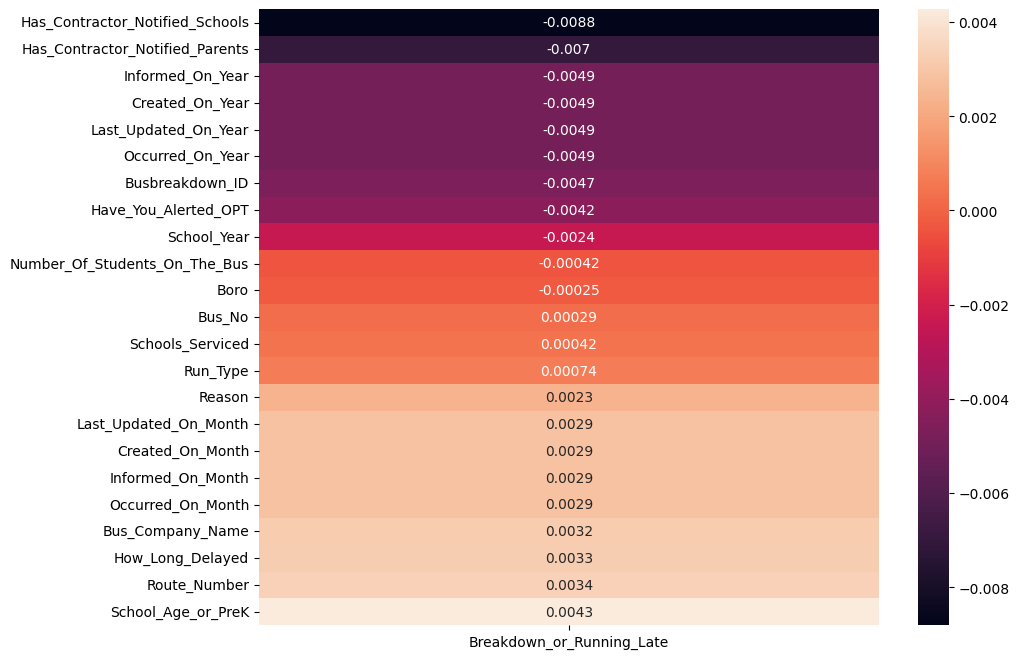

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()['Breakdown_or_Running_Late'].sort_values().drop('Breakdown_or_Running_Late').to_frame(), annot=True)

In [97]:
df.corr()['Breakdown_or_Running_Late'].abs().sort_values(ascending=False)[0:15]

,Breakdown_or_Running_Late
Breakdown_or_Running_Late,1.000000
Has_Contractor_Notified_Schools,0.008804
Has_Contractor_Notified_Parents,0.006970
Last_Updated_On_Year,0.004880
Informed_On_Year,0.004880
Created_On_Year,0.004880
Occurred_On_Year,0.004880
Busbreakdown_ID,0.004660
School_Age_or_PreK,0.004276
Have_You_Alerted_OPT,0.004212


In [98]:
df.drop(columns=['Last_Updated_On_Month','Last_Updated_On_Year','Informed_On_Month','Informed_On_Year','Created_On_Month','Created_On_Year'],axis=1,inplace=True)

In [99]:
df.shape

(120553, 18)

<Axes: >

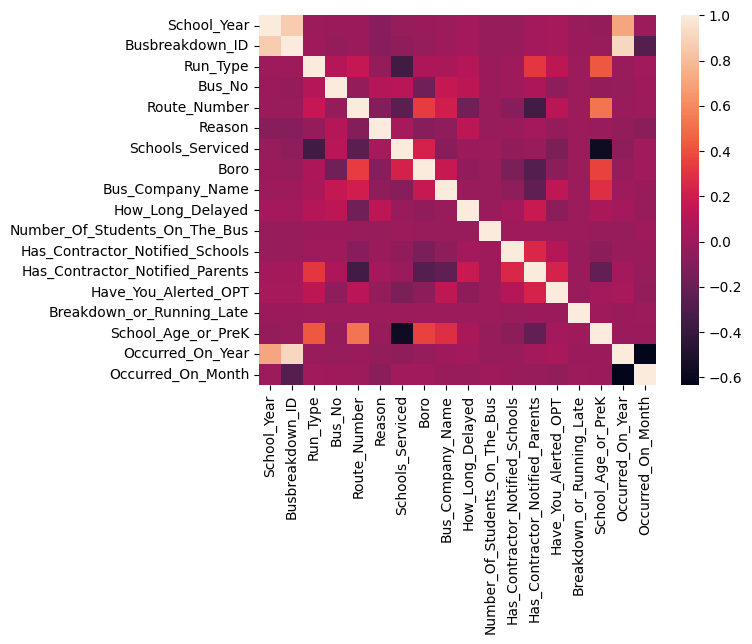

In [100]:
sns.heatmap(df.corr())

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [51]:
X = df.drop('Breakdown_or_Running_Late',axis=1)
y = df['Breakdown_or_Running_Late']


In [52]:
from scipy import stats
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(X.shape,X[filtered_entries].shape)
X = X[filtered_entries]
y = y[filtered_entries]

(120553, 17) (111392, 17)


In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

(array([89184.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 89030.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

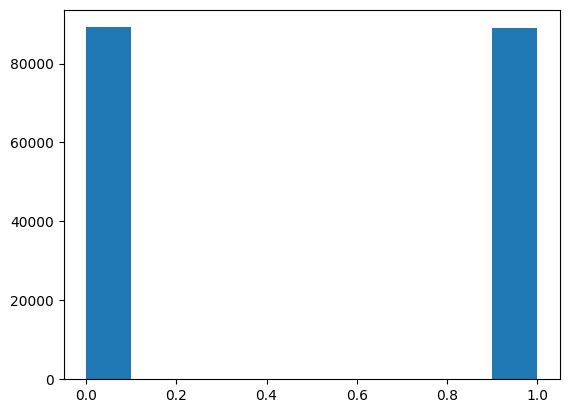

In [ ]:
plt.hist(y_train)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=3)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,callbacks=early_stop)

Epoch 1/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9724 - loss: 0.0735 - val_accuracy: 0.9997 - val_loss: 8.5468e-04
Epoch 2/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 3/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9999 - val_loss: 3.4964e-04
Epoch 4/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9997 - loss: 9.6395e-04 - val_accuracy: 0.9999 - val_loss: 1.8226e-04
Epoch 5/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 2.8920e-04
Epoch 6/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9998 - loss: 5.6587e-04 - val_accuracy: 0.9997 - val_loss: 0.0010
Epoch 7/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9998 - loss: 7.9493e-04 - val_accuracy: 1.0000 - val_loss: 5.3008e-05
Epoch 8/10
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/s

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test,y_test)

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 3.1677e-04


[0.00034689935273490846, 0.9999326467514038]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.predict(X_test[0:1])
y_pred = np.where(y_pred>0.5,1,0)
true_label = y_test.iloc[0]
print(f"True Label: {true_label}")
print(f"Predicted Label: {y_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
True Label: 0
Predicted Label: 0


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

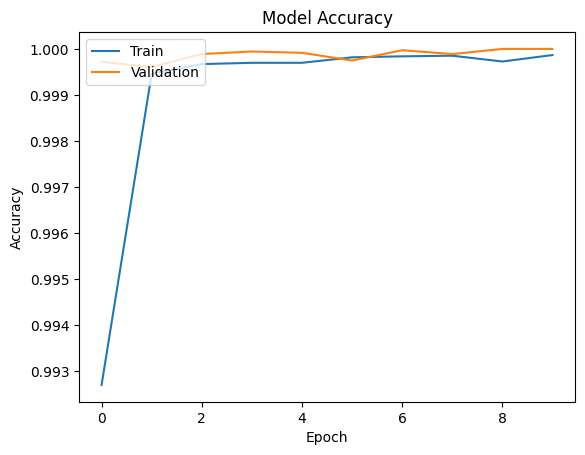

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22200
           1       1.00      1.00      1.00     22354

    accuracy                           1.00     44554
   macro avg       1.00      1.00      1.00     44554
weighted avg       1.00      1.00      1.00     44554

[[22197     3]
 [    0 22354]]


## Save the Model
Save the trained model for submission.

In [ ]:
model.save('Breakdown_or_Running_Late_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Data Preprocessing: i encoded the data to numerical values so the model understands it, usnig mapping and label encoder i was able to encode the data,
also using zscore technique to get rid of the outliers and these processing steps are important and effect the model ability ot generalize the data

Model Architecture: started with a simple nural network and found that its affective so added one hidden layer with dropout and batchnormalization

Training process: first started with 100 epoch the reduced the number becuase the model was doing well on the first epochs so used 10, using the adam as an optimizer with a learning rate of 0.001, the training process was easy and didn't had to make alot of runs

Loss function: choosed binary_crossentropy becuase we have only 2 classes to predict

Regularization Techniques: used dropout,Batchnormalization, early stopping to prevent over fitting and it worked prefectly without any issues

Model Evaluation: the model was good giving an accuracy of 100% on the testing data, 99 for both training and testing

Didn't had to do model tuning becuase the data is simple and the model arch was very good

the model encountered under fitting when the model arch was simple but when the model complexity incresed the the under fitting was gone